Import Library

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Input Data

In [8]:
df = pd.read_csv('pubg_review_cleaned.csv')
df = df[['score', 'cleaned', 'sentiment', 'aspect']]
df

,score,cleaned,sentiment,aspect
0,1,ping jumping saat ketemu musuh dan normal kemb...,Negative,['server']
1,5,wohooooo,Positive,['Lainnya']
2,1,susah sekali menangnya kita cuma jadi samsak b...,Negative,['Lainnya']
3,5,gamenya bagus,Positive,['Lainnya']
4,5,gamenya bagus,Positive,['Lainnya']
...,...,...,...,...
4995,5,seru bet dan realistis bet goyangan nya keren ...,Positive,['Lainnya']
4996,4,pemain nya pakai cheat tolong dihapus cheater,Positive,['cheater']
4997,1,terlalu sering di upgrade bikin player miskin ...,Negative,['update']
4998,1,developer nya parah masih mending tencent dari...,Negative,['Lainnya']


In [9]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])
df

,score,cleaned,sentiment,aspect,label
0,1,ping jumping saat ketemu musuh dan normal kemb...,Negative,['server'],0
1,5,wohooooo,Positive,['Lainnya'],2
2,1,susah sekali menangnya kita cuma jadi samsak b...,Negative,['Lainnya'],0
3,5,gamenya bagus,Positive,['Lainnya'],2
4,5,gamenya bagus,Positive,['Lainnya'],2
...,...,...,...,...,...
4995,5,seru bet dan realistis bet goyangan nya keren ...,Positive,['Lainnya'],2
4996,4,pemain nya pakai cheat tolong dihapus cheater,Positive,['cheater'],2
4997,1,terlalu sering di upgrade bikin player miskin ...,Negative,['update'],0
4998,1,developer nya parah masih mending tencent dari...,Negative,['Lainnya'],0


In [30]:
x = df['cleaned']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Naive Bayes

In [35]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)


In [38]:
df_test_nb = X_test.to_frame()
df_test_nb['true_sentiment'] = le.inverse_transform(y_test)
df_test_nb['pred_sentiment'] = le.inverse_transform(y_pred_nb)

df_test_nb

,cleaned,true_sentiment,pred_sentiment
2668,thank level infinite masalah seperti bug fps d...,Positive,Positive
903,please min colab sama residen evil lagiii,Positive,Positive
3322,game terbaik bagi glacier pleasee,Positive,Positive
2553,sekarang maen sebentar malah for close padahal...,Negative,Negative
3002,sangat suka,Positive,Positive
...,...,...,...
3224,mantap,Positive,Positive
2868,keren banget,Positive,Positive
2216,untuk devtolong kalau bisa obb nya di tiada ka...,Positive,Positive
3040,sagan puas dengan pubg,Positive,Positive


Logistic Regression

In [39]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

In [40]:
df_test_lr = X_test.to_frame()
df_test_lr['true_sentiment'] = le.inverse_transform(y_test)
df_test_lr['pred_sentiment'] = le.inverse_transform(y_pred_lr)

df_test_lr

,cleaned,true_sentiment,pred_sentiment
2668,thank level infinite masalah seperti bug fps d...,Positive,Positive
903,please min colab sama residen evil lagiii,Positive,Positive
3322,game terbaik bagi glacier pleasee,Positive,Positive
2553,sekarang maen sebentar malah for close padahal...,Negative,Negative
3002,sangat suka,Positive,Positive
...,...,...,...
3224,mantap,Positive,Positive
2868,keren banget,Positive,Positive
2216,untuk devtolong kalau bisa obb nya di tiada ka...,Positive,Positive
3040,sagan puas dengan pubg,Positive,Positive


In [41]:
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred_lr))

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred_nb))


=== Logistic Regression ===
              precision    recall  f1-score   support

    Negative       0.71      0.57      0.63       236
     Neutral       0.00      0.00      0.00        51
    Positive       0.83      0.94      0.88       713

    accuracy                           0.81      1000
   macro avg       0.51      0.50      0.50      1000
weighted avg       0.76      0.81      0.78      1000

[[134   0 102]
 [ 15   0  36]
 [ 41   0 672]]
=== Naive Bayes ===
              precision    recall  f1-score   support

    Negative       0.77      0.38      0.51       236
     Neutral       0.00      0.00      0.00        51
    Positive       0.79      0.98      0.87       713

    accuracy                           0.79      1000
   macro avg       0.52      0.45      0.46      1000
weighted avg       0.74      0.79      0.74      1000

[[ 89   0 147]
 [ 11   0  40]
 [ 16   0 697]]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

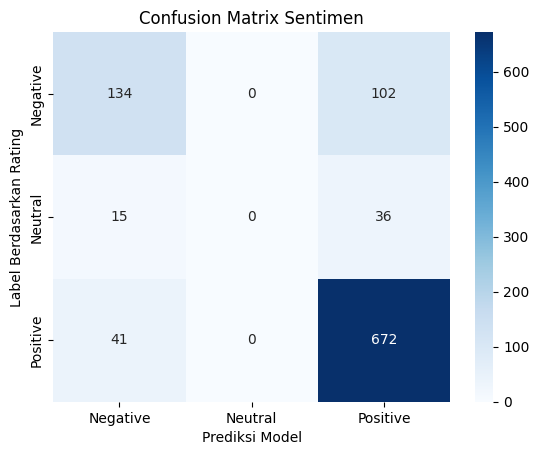

In [43]:
cm = confusion_matrix(df_test_lr['true_sentiment'], df_test_lr['pred_sentiment'], labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prediksi Model")
plt.ylabel("Label Berdasarkan Rating")
plt.title("Confusion Matrix Sentimen")
plt.show()

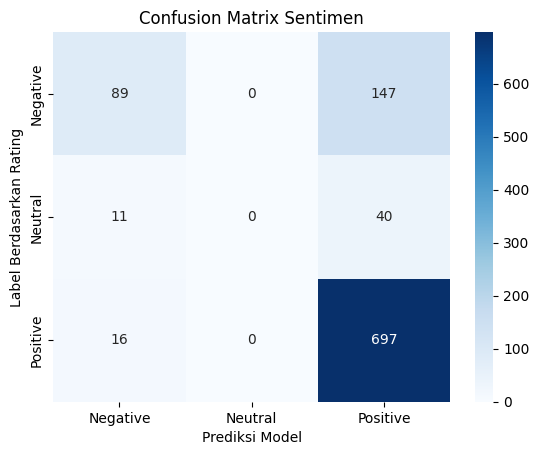

In [44]:
cm = confusion_matrix(df_test_nb['true_sentiment'], df_test_nb['pred_sentiment'], labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prediksi Model")
plt.ylabel("Label Berdasarkan Rating")
plt.title("Confusion Matrix Sentimen")
plt.show()